In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
from pmlb import fetch_data
import time

from howso.engine import Trainee
from howso.utilities import infer_feature_attributes


import os
cpu_counts = os.cpu_count()
cpu_counts

8

In [2]:

# Parameters
num_list = [50_000, 500_000, 2_000_000, 4_000_000, 6_000_000, 7_000_000]
mp_times = []
no_mp_times = []
for num in num_list:
    start_date = pd.Timestamp('2023-01-01 00:00:00')
    interval = pd.Timedelta(seconds=1)
    num_entries = num

    # Generate the date-time column
    date_time_column = pd.date_range(start=start_date, periods=num_entries, freq=interval)

    # Generate random time series data for 3 columns
    np.random.seed(0)  # For reproducibility
    data1 = np.random.randn(num_entries)
    data2 = np.random.randn(num_entries)
    data3 = np.random.randn(num_entries)

    # Create DataFrame
    df = pd.DataFrame({
        'DateTime': date_time_column,
        'RandomData1': data1,
        'RandomData2': data2,
        'RandomData3': data3
    })

    # Start time
    start_time = time.time()
    # Infer feature attributes
    features = infer_feature_attributes(
        df,
        time_feature_name = "DateTime",
        series_max_workers=cpu_counts
        )

    # End time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_mp = end_time - start_time
    mp_times.append(elapsed_time_mp)


    start_time = time.time()
    features2 = infer_feature_attributes(
        df,
        time_feature_name = "DateTime",
        series_max_workers=0
        )
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_no_mp = end_time - start_time
    no_mp_times.append(elapsed_time_no_mp)

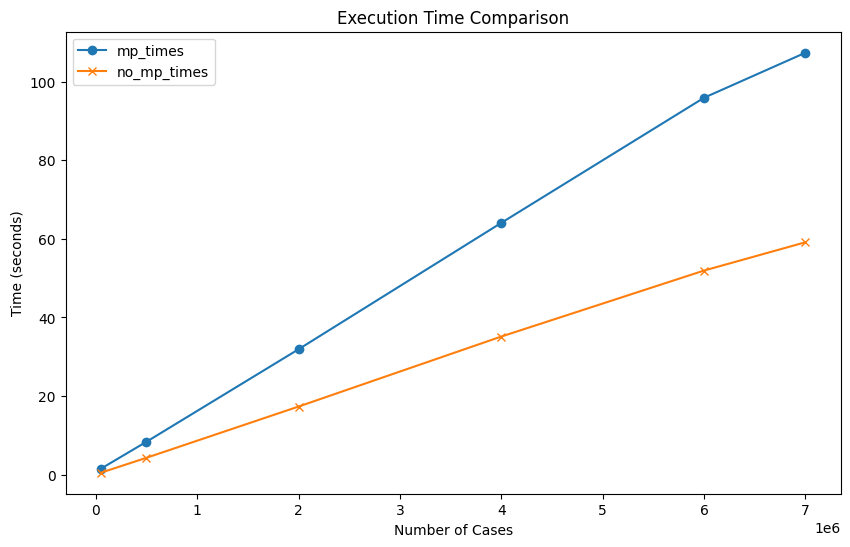

In [3]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mp_times
plt.plot(num_list, mp_times, label='mp_times', marker='o')

# Plot no_mp_times
plt.plot(num_list, no_mp_times, label='no_mp_times', marker='x')

# Add title and labels
plt.title('Execution Time Comparison')
plt.xlabel('Number of Cases')
plt.ylabel('Time (seconds)')

# Add legend
plt.legend()

# Show the plot
plt.show()